### Ojectives
1. Data Anlaysis
2. Building model for prediction
3. Hyper parameter Tuning
4. Deployment Basis

In [1]:
import pandas as pd

In [2]:
credit_data = pd.read_excel('credit_data.xls')

In [3]:
credit_data


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
columns = (credit_data[:1].values)

In [5]:
columns = list(columns[0])

In [6]:
credit_data.drop([0], axis = 0)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
credit_data.columns =  columns

In [10]:
credit_data.index = credit_data['ID']

In [11]:
credit_data.drop(columns =['ID'], inplace = True)

In [12]:
credit_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Observation about the target column
1. Since the target column is to predict the payment is defalut made by customer or not.

In [13]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30001 non-null object
SEX                           30001 non-null object
EDUCATION                     30001 non-null object
MARRIAGE                      30001 non-null object
AGE                           30001 non-null object
PAY_0                         30001 non-null object
PAY_2                         30001 non-null object
PAY_3                         30001 non-null object
PAY_4                         30001 non-null object
PAY_5                         30001 non-null object
PAY_6                         30001 non-null object
BILL_AMT1                     30001 non-null object
BILL_AMT2                     30001 non-null object
BILL_AMT3                     30001 non-null object
BILL_AMT4                     30001 non-null object
BILL_AMT5                     30001 non-null object
BILL_AMT6                     30001 non-null object
PAY_AMT1   

In [14]:
credit_data.rename (columns= {'default payment next month':'def_pay_month'}, inplace = True)

In [15]:
credit_data.def_pay_month.value_counts()

0                             23364
1                              6636
default payment next month        1
Name: def_pay_month, dtype: int64

In [16]:
credit_data = credit_data[1:]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

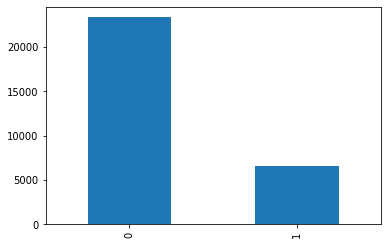

In [18]:
credit_data.def_pay_month.value_counts().plot.bar()

In [19]:
credit_data.def_pay_month.value_counts()

0    23364
1     6636
Name: def_pay_month, dtype: int64

#### Observations from above columns
1. The target column values are imbalanced hence we have to balance them first

In [20]:
data = credit_data.filter(regex= 'PAY_[0-9]') # Filter the columns or select the columns using the regular expressions
data

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,
1,2,2,-1,-1,-2,-2
2,-1,2,0,0,0,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29996,0,0,0,0,0,0
29997,-1,-1,-1,-1,0,0
29998,4,3,2,-1,0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 6 columns):
PAY_0    30000 non-null object
PAY_2    30000 non-null object
PAY_3    30000 non-null object
PAY_4    30000 non-null object
PAY_5    30000 non-null object
PAY_6    30000 non-null object
dtypes: object(6)
memory usage: 1.6+ MB


<b> In columns Pay_0...5 0/-1/-2 represents paymets done <b/>

Putting all them in same bucket

In [22]:
data.columns

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype='object')

### making the pay column values with -2,-1, 0 to one bucket since they belong to paid category

In [23]:
for col in data.columns:
    credit_data[col]= data[col].map(lambda v: 0 if v < 0 else v)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Baselining model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [25]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL        30000 non-null object
SEX              30000 non-null object
EDUCATION        30000 non-null object
MARRIAGE         30000 non-null object
AGE              30000 non-null object
PAY_0            30000 non-null int64
PAY_2            30000 non-null int64
PAY_3            30000 non-null int64
PAY_4            30000 non-null int64
PAY_5            30000 non-null int64
PAY_6            30000 non-null int64
BILL_AMT1        30000 non-null object
BILL_AMT2        30000 non-null object
BILL_AMT3        30000 non-null object
BILL_AMT4        30000 non-null object
BILL_AMT5        30000 non-null object
BILL_AMT6        30000 non-null object
PAY_AMT1         30000 non-null object
PAY_AMT2         30000 non-null object
PAY_AMT3         30000 non-null object
PAY_AMT4         30000 non-null object
PAY_AMT5         30000 non-null object
PAY_AMT6         30000 non-null object
def_p

In [26]:
for col  in credit_data.columns:
    credit_data[col] = credit_data[col].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL        30000 non-null int64
SEX              30000 non-null int64
EDUCATION        30000 non-null int64
MARRIAGE         30000 non-null int64
AGE              30000 non-null int64
PAY_0            30000 non-null int64
PAY_2            30000 non-null int64
PAY_3            30000 non-null int64
PAY_4            30000 non-null int64
PAY_5            30000 non-null int64
PAY_6            30000 non-null int64
BILL_AMT1        30000 non-null int64
BILL_AMT2        30000 non-null int64
BILL_AMT3        30000 non-null int64
BILL_AMT4        30000 non-null int64
BILL_AMT5        30000 non-null int64
BILL_AMT6        30000 non-null int64
PAY_AMT1         30000 non-null int64
PAY_AMT2         30000 non-null int64
PAY_AMT3         30000 non-null int64
PAY_AMT4         30000 non-null int64
PAY_AMT5         30000 non-null int64
PAY_AMT6         30000 non-null int64
def_pay_month    30000

In [28]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(credit_data.drop(columns = ['def_pay_month']), credit_data.def_pay_month)

In [29]:
de = DecisionTreeClassifier()

In [30]:
de.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
de.score(testX, testY)

0.7262666666666666

In [32]:
le = LogisticRegression()
le.fit(trainX, trainY)
le.score(testX, testY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7788

In [33]:
data_new = credit_data

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector
se = SequentialFeatureSelector(k_features= 5, estimator=DecisionTreeClassifier())

In [35]:
ss=  se.fit_transform(data_new.drop(columns = ['def_pay_month']), credit_data.def_pay_month)

In [36]:
trainX, testX, trainY, testY = train_test_split(ss, credit_data.def_pay_month )


In [37]:
de.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
de.score(testX, testY)

0.8132

In [39]:
credit_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
y_pred = de.predict(testX)

In [43]:
cs = confusion_matrix(y_pred= y_pred, y_true=testY)

In [44]:
pd.DataFrame(cs, columns = ["pridict0", 'pridict1'], index = ["actual0",'actual1'])

,pridict0,pridict1
actual0,5574,273
actual1,1128,525


In [45]:
pd.DataFrame(cs, columns = ["pridict0", 'pridict1'], index = ["actual0",'actual1'])

,pridict0,pridict1
actual0,5574,273
actual1,1128,525


1. From the above table we can say that 1104 no.s of deaflaulters were not predicted.they will skip the checks and surinity of the bank
2. out of 1104+552 we were found 1104+552 we have missed the 1104 values which is very bad
3. We are able to catch only 40% of the defaulterms

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE()

In [52]:
feature_data, target_data = smote.fit_sample(data_new.drop(columns = ['def_pay_month']), credit_data.def_pay_month)

In [112]:
trainX, testX, trainY, testY = train_test_split(feature_data, target_data)

In [55]:
de.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
de.score(testX, testY)

0.7472179421331964

In [57]:
y_pred = de.predict(testX)

In [61]:
cs= confusion_matrix(y_pred = y_pred, y_true= testY)

In [62]:
pd.DataFrame(cs, columns = ["predi 1", "predi 2"], index = ["actual 1",'Actual 2'])

,predi 1,predi 2
actual 1,4177,1551
Actual 2,1402,4552


Obervation from the above table that the accuary of the model increased by the balancing the target column using the imblearn module


In [64]:
4552/(1402+4552) # Since we got 76% of acuracy using the imblearn.

0.7645280483708431

In [65]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [66]:
#f1-score
f1_score(y_pred, testY)

0.7550800364933234

In [67]:
#recall_score

recall_score(y_pred,testY)

0.7458626904800918

In [68]:
#Precision_score
precision_score(y_pred,testY)

0.7645280483708431

### Now from all the score models we will observe that we the algorithm can predict 75% of the defaulters

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
re = RandomForestClassifier(n_estimators= 100, n_jobs=3)

In [78]:
re.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [79]:
re.score(testX, testY)

0.842321520287622

In [80]:
y_pred = re.predict(testX)

In [81]:
cs= confusion_matrix(y_pred=y_pred, y_true= testY)

In [82]:
cs

array([[4939,  789],
       [1053, 4901]], dtype=int64)

In [83]:
f1_score(y_pred,testY)

0.8418069391961525

In [89]:
columns = credit_data.drop(columns =['def_pay_month'])

In [93]:
new_data = pd.Series(re.feature_importances_, index =columns.columns )

In [98]:
top_data = list(new_data.sort_values(ascending=False).index[:5])

In [99]:
top_data

['BILL_AMT1', 'LIMIT_BAL', 'PAY_0', 'AGE', 'PAY_2']

In [100]:
trainX, testX, trainY,testY = train_test_split(credit_data[top_data], credit_data.def_pay_month)

In [101]:
re.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [102]:
re.score(testX, testY)

0.7857333333333333

In [103]:
### Confusion Matrix

In [104]:
y_pred = re.predict(testX)

In [107]:
ss = confusion_matrix(y_pred= y_pred, y_true = testY)

In [108]:
ss

array([[5258,  566],
       [1041,  635]], dtype=int64)

In [111]:
feature_data


array([[ 20000,      2,      2, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 50000,      1,      2, ...,    798,   1809,    763],
       [ 50000,      1,      2, ...,   1463,    747,    911],
       [ 90000,      2,      1, ...,   2608,   5390,   3395]], dtype=int64)

In [113]:
from scipy.io import arff

In [118]:
import pandas as pd
import numpy as np

In [122]:
mm = arff.loadarff('amazon.arff')
df = pd.DataFrame(mm[0])

df.head(10)

ValueError: field 'class' occurs more than once

In [126]:
from scipy.io.arff import loadarff

In [128]:
data = loadarff('amazon.arff')
new_data = pd.DataFrame(data[0])


ValueError: field 'class' occurs more than once